In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='facebook/opt-350m'

In [3]:
results = {'acc':[],
           'f1':[],
           'a':[]}

In [4]:
r = 16
lora_alpha = [4,8,16,32]
lora_dropout = 0.0
lr = 1.0e-5
g = 8
wd = 0.0

for a in lora_alpha:
    print(f'Grid search {model_checkpoint}, lr: {lr}. Focal loss gamma: {g}. Weight decay {wd}. Lora rank: {r}. Lora alpha: {a}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                                num_labels=data.num_labels,
                                lora=True,
                                r=r,
                                alpha=a,
                                dropout=lora_dropout)
    trainer = Engine(epochs=10,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          early_stop=3,
                          gamma=g)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['a'].append(a)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search facebook/opt-350m, lr: 1e-05. Focal loss gamma: 8. Weight decay 0.0. Lora rank: 16. Lora alpha: 4


Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.7338	Val Loss:	0.8247	Accuracy:	0.5886	F1:	0.5121
2 / 10: Train Loss:	0.2964	Val Loss:	0.7658	Accuracy:	0.5864	F1:	0.5043
3 / 10: Train Loss:	0.1894	Val Loss:	0.7492	Accuracy:	0.5842	F1:	0.4985
4 / 10: Train Loss:	0.1627	Val Loss:	0.7390	Accuracy:	0.5711	F1:	0.4803
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.24      0.29      0.26       119
      struct       0.73      0.67      0.70       338

    accuracy                           0.57       457
   macro avg       0.48      0.48      0.48       457
weighted avg       0.60      0.57      0.58       457

test results:
              precision    recall  f1-score   support

       bknow       0.24      0.34      0.28        67
      struct       0.72      0.61      0.66       189

    accuracy                           0.54       256
   macro avg       0.48      0.48      0.47       256
weighted av

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.6225	Val Loss:	0.8290	Accuracy:	0.5646	F1:	0.5104
2 / 10: Train Loss:	0.2396	Val Loss:	0.7608	Accuracy:	0.5755	F1:	0.4923
3 / 10: Train Loss:	0.1518	Val Loss:	0.7551	Accuracy:	0.5383	F1:	0.4579
4 / 10: Train Loss:	0.1398	Val Loss:	0.7477	Accuracy:	0.5602	F1:	0.4773
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.24      0.31      0.27       119
      struct       0.73      0.65      0.69       338

    accuracy                           0.56       457
   macro avg       0.48      0.48      0.48       457
weighted avg       0.60      0.56      0.58       457

test results:
              precision    recall  f1-score   support

       bknow       0.26      0.37      0.30        67
      struct       0.74      0.62      0.67       189

    accuracy                           0.55       256
   macro avg       0.50      0.50      0.49       256
weighted av

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.5137	Val Loss:	0.7794	Accuracy:	0.5536	F1:	0.4829
2 / 10: Train Loss:	0.1760	Val Loss:	0.7613	Accuracy:	0.5405	F1:	0.4657
3 / 10: Train Loss:	0.1213	Val Loss:	0.7468	Accuracy:	0.5711	F1:	0.4780
4 / 10: Train Loss:	0.1114	Val Loss:	0.7495	Accuracy:	0.5470	F1:	0.4703
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.23      0.32      0.27       119
      struct       0.72      0.63      0.67       338

    accuracy                           0.55       457
   macro avg       0.48      0.47      0.47       457
weighted avg       0.60      0.55      0.57       457

test results:
              precision    recall  f1-score   support

       bknow       0.23      0.39      0.29        67
      struct       0.72      0.55      0.62       189

    accuracy                           0.51       256
   macro avg       0.48      0.47      0.46       256
weighted av

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.4011	Val Loss:	0.7937	Accuracy:	0.5011	F1:	0.4608
2 / 10: Train Loss:	0.1296	Val Loss:	0.7519	Accuracy:	0.5580	F1:	0.4714
3 / 10: Train Loss:	0.0903	Val Loss:	0.7403	Accuracy:	0.5558	F1:	0.4742
4 / 10: Train Loss:	0.0835	Val Loss:	0.7480	Accuracy:	0.5449	F1:	0.4785
5 / 10: Train Loss:	0.0741	Val Loss:	0.7108	Accuracy:	0.5799	F1:	0.4975
6 / 10: Train Loss:	0.0667	Val Loss:	0.7201	Accuracy:	0.5733	F1:	0.5186
7 / 10: Train Loss:	0.0650	Val Loss:	0.7204	Accuracy:	0.5449	F1:	0.5174
8 / 10: Train Loss:	0.0670	Val Loss:	0.6715	Accuracy:	0.6105	F1:	0.5238
9 / 10: Train Loss:	0.0530	Val Loss:	0.6802	Accuracy:	0.6039	F1:	0.5312
10 / 10: Train Loss:	0.0487	Val Loss:	0.6696	Accuracy:	0.6127	F1:	0.5254
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.30      0.35      0.32       119
      struct       0.76      0.70      0.73       338

    accuracy                           0.61       457
   macro avg      

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results = {'acc': [0.5390625, 0.5546875, 0.5078125, 0.60546875], 'f1': [0.4707036725539669, 0.48864592094196807, 0.45744466123931904, 0.5565845209308706], 'a': [4, 8, 16, 32]}

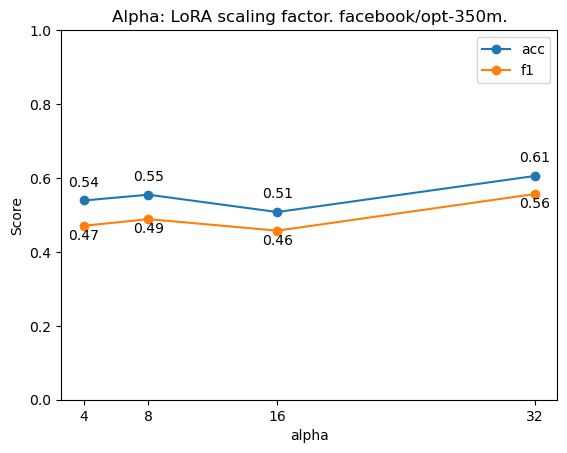

In [8]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='a', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["a"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["a"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['a'], [val for val in df['a']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('alpha')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Alpha: LoRA scaling factor. {model_checkpoint}.')